In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

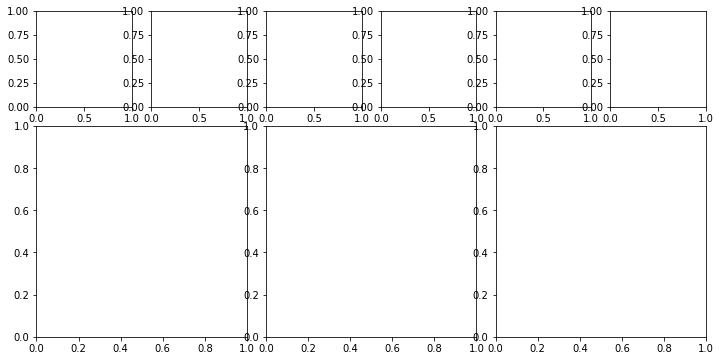

In [2]:
fig = plt.figure(figsize=(12, 6))

gridsize = (3, 6)

for i in range(6):
    ax_kde = plt.subplot2grid(gridsize, (0, i))
    
for i in range(3):
    ax_img = plt.subplot2grid(gridsize, (1, 2*i), rowspan=2, colspan=2)
    
fig.savefig("./46-bnvis_6.png")    

In [3]:
img0 = plt.imread("./4-bn_0.jpg")
img1 = plt.imread("./4-bn_1.jpg")
img2 = plt.imread("./4-bn_2.jpg")

img_shape = img0.shape

imgs = np.zeros((3, ) + img_shape)
imgs[0] = img0/255.0
imgs[1] = img1/255.0
imgs[2] = img2/255.0

imgs_tensor = tf.convert_to_tensor(imgs, dtype="float32")

from tensorflow.keras.models import Sequential

model = Sequential([
    layers.BatchNormalization()
])
model.compile()

bn1 = model(imgs_tensor, training=True)
bn1_numpy = bn1.numpy()

In [4]:
def plot(imgs, xlim=None, suptitle=None):
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
    axs = axes.ravel()

    # image
    for ax, img in zip(axs[:3], imgs):
        ax.imshow(img)

    # kdeplot
    xlim_ = 0
    for ax, img in zip(axs[3:], imgs):
        colors = ["r", "g", "b"]
        [sns.kdeplot(img[:,:,ch].flatten(), color=c, fill=True, cut=0, ax=ax) for (ch, c) in zip(range(3), colors)]
        xlim_ax = ax.get_xlim()
        xlim_ = max(xlim_, max(-xlim_ax[0], xlim_ax[1]))        
    
    if xlim == None:
        axs[3].set_xlim(-xlim_, xlim_)
        axs[4].set_xlim(-xlim_, xlim_)
        axs[5].set_xlim(-xlim_, xlim_)
    else:
        axs[3].set_xlim(-xlim, xlim)
        axs[4].set_xlim(-xlim, xlim)
        axs[5].set_xlim(-xlim, xlim)
        
    if suptitle != None:
        fig.suptitle(suptitle, fontsize=24)
    
    fig.tight_layout()
    return fig, axes

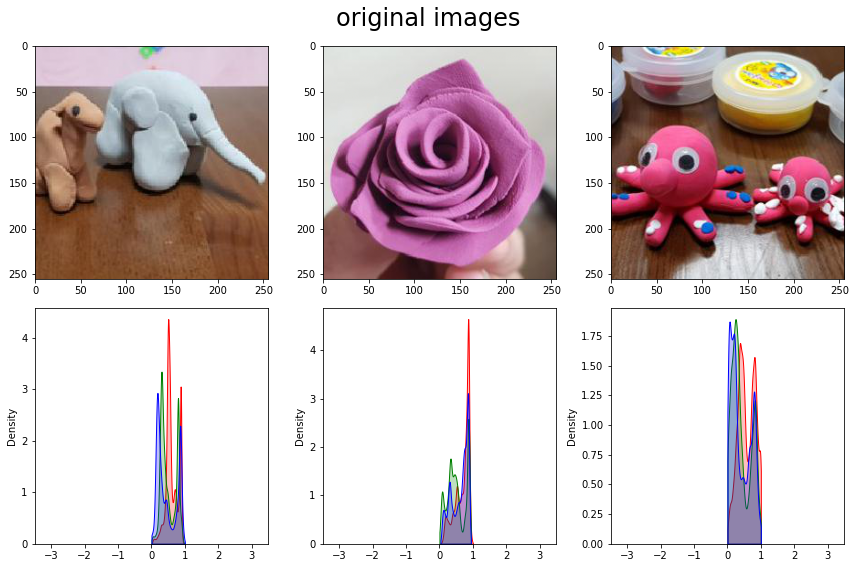

In [5]:
fig, axes = plot(imgs, 3.5, "original images")
fig.savefig("./46-bnvis_1.png")    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


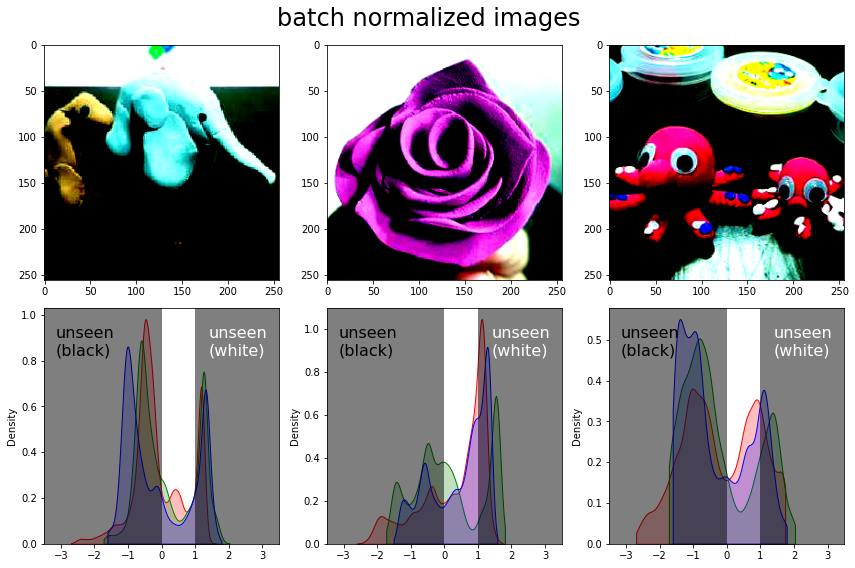

In [6]:
fig, axes = plot(bn1_numpy, 3.5, "batch normalized images")
for ax in axes[1, :]:
    ax.axvspan(-3.5, 0, facecolor="k", alpha=0.5)
    ax.axvspan(1, 3.5, facecolor="k", alpha=0.5)
    ax.text(0.05, 0.8, "unseen\n(black)", transform=ax.transAxes, fontsize=16)
    ax.text(0.7, 0.8, "unseen\n(white)", transform=ax.transAxes, fontsize=16, color="w")

fig.savefig("./46-bnvis_2.png")    

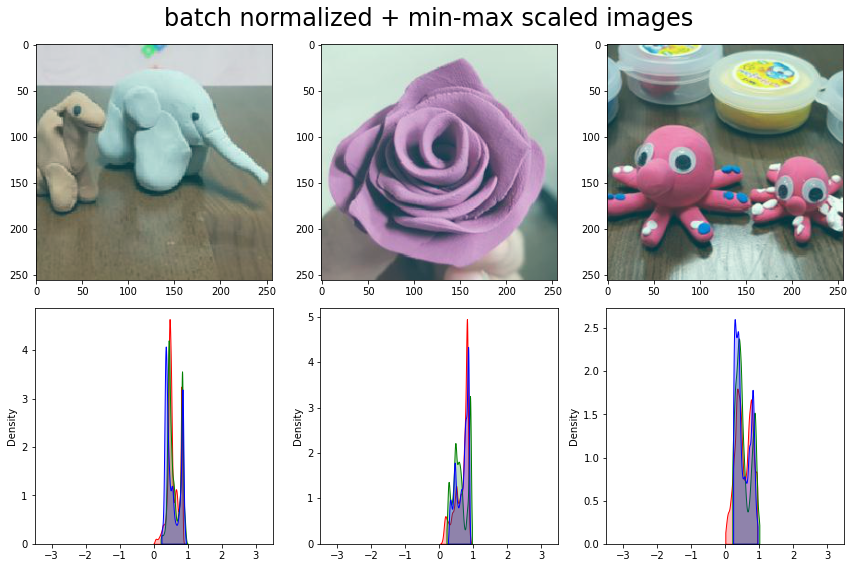

In [7]:
bn_min, bn_max = bn1_numpy.min(), bn1_numpy.max()

# min-max scaling
bn_mm = (bn1_numpy - bn_min)/(bn_max - bn_min)

fig, axes = plot(bn_mm, 3.5, "batch normalized + min-max scaled images")
fig.savefig("./46-bnvis_3.png")    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


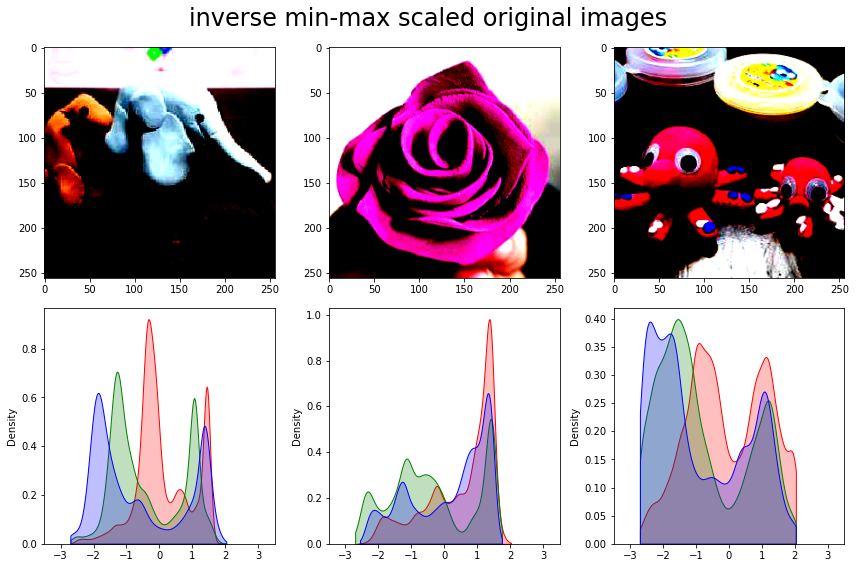

In [9]:
# inverse min-max scaling
imgs_imm = imgs*(bn_max - bn_min) +bn_min

fig, axes = plot(imgs_imm, 3.5, "inverse min-max scaled original images")
fig.savefig("./46-bnvis_4.png")    

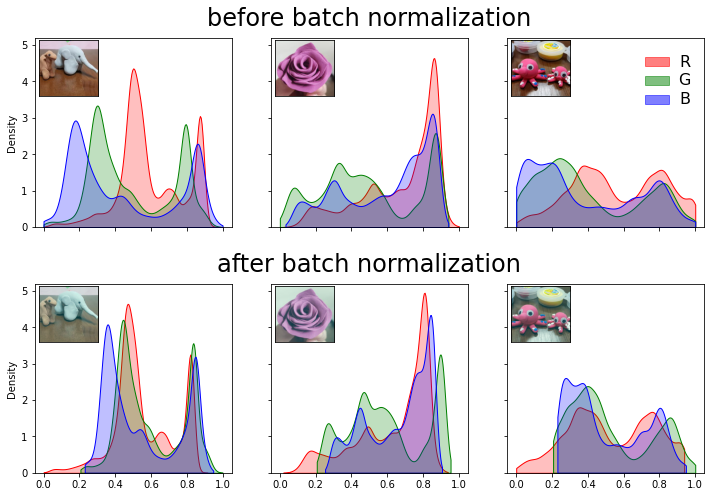

In [55]:
### kdeplot들끼리만 비교
from matplotlib import patches

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8), sharex=True, sharey=True,
                        gridspec_kw={"hspace":0.3})

colors = ["r", "g", "b"]
for ax, img in zip(axes[0], imgs):
    [sns.kdeplot(img[:,:,ch].flatten(), color=c, fill=True, cut=0, ax=ax) for (ch, c) in zip(range(3), colors)]
    ax_inset = ax.inset_axes([0.02, 0.69, 0.3, 0.3])
    ax_inset.imshow(img)
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])

for ax, b in zip(axes[1], bn_mm):
    [sns.kdeplot(b[:,:,ch].flatten(), color=c, fill=True, cut=0, ax=ax) for (ch, c) in zip(range(3), colors)]
    ax_inset = ax.inset_axes([0.02, 0.69, 0.3, 0.3])
    ax_inset.imshow(b)
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])

axes[0, 1].set_title("before batch normalization", fontsize=24, pad=12)
axes[1, 1].set_title("after batch normalization", fontsize=24, pad=12)

# legends
for i, c in enumerate(colors):
    x = 0.7
    y = 0.85 - 0.1*i
    Rectangle = patches.Rectangle((x, y), 0.12, 0.05, color=c, alpha=0.5, transform=axes[0, 2].transAxes)
    axes[0, 2].add_patch(Rectangle)
    axes[0, 2].text(x+0.2, y, c.upper(), fontdict={"fontsize":16, "color":"k"}, ha="center", transform=axes[0, 2].transAxes)

fig.savefig("./46-bnvis_5.png")    

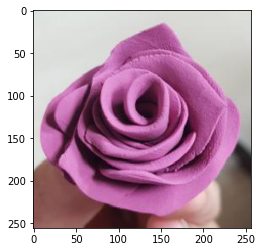

In [11]:
plt.imshow(imgs[1])
plt.savefig("./46-bnvis_7.png")    

In [12]:
img_shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


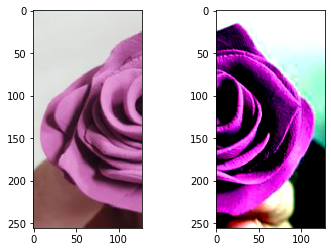

In [47]:
img_half = img_shape[0]//2
img1_org = imgs[1][:, :img_half, :]
img1_bn = bn1_numpy[1][:, img_half:, :]

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(img1_org)
axs[1].imshow(img1_bn)

plt.savefig("./46-bnvis_8.png")    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


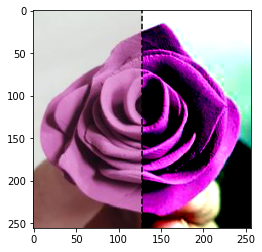

In [48]:
img1_c = np.concatenate((img1_org, img1_bn), axis=1)

fig, ax = plt.subplots()
ax.imshow(img1_c)
ax.axvline(128, ls="--", c="k")
plt.savefig("./46-bnvis_9.png")    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


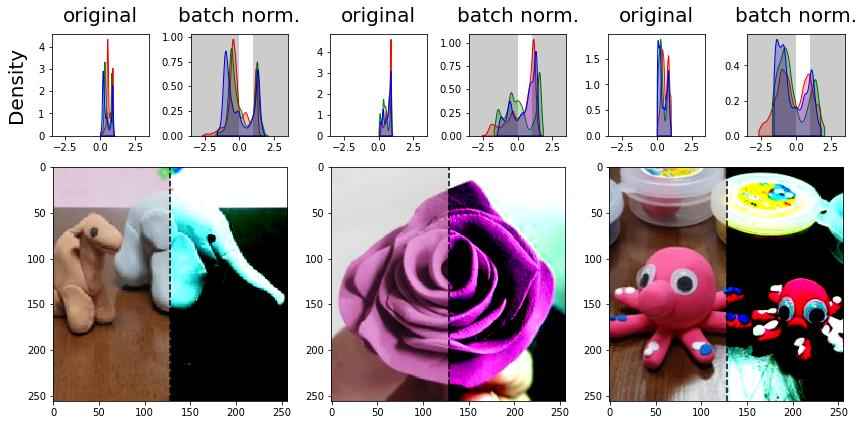

In [46]:
fig = plt.figure(figsize=(12, 6))

gridsize = (3, 6)

for i in range(6):
    ax_kde = plt.subplot2grid(gridsize, (0, i))
        
    if i%2 == 0: # original image kdeplot
        colors = ["r", "g", "b"]
        [sns.kdeplot(imgs[i//2, :,:,ch].flatten(), color=c, fill=True, cut=0, ax=ax_kde) for (ch, c) in zip(range(3), colors)]
        ax_kde.set_title("original", fontsize=20, pad=12)
        
        
    else: # batch normalized image kdeplot
        colors = ["r", "g", "b"]
        [sns.kdeplot(bn1_numpy[i//2, :,:,ch].flatten(), color=c, fill=True, cut=0, ax=ax_kde) for (ch, c) in zip(range(3), colors)]
        ax_kde.axvspan(-3.5, 0, facecolor="k", alpha=0.2)
        ax_kde.axvspan(1, 3.5, facecolor="k", alpha=0.2)
        ax_kde.set_title("batch norm.", fontsize=20, pad=12)
        

    ax_kde.set_xlim(-3.5, 3.5)
    
    if i == 0:
        ax_kde.set_ylabel("Density", fontsize=20, labelpad=12)
    else:
        ax_kde.set_ylabel("")

def img_c(img0, img1):
    img0_ = img0[:, :img_half, :]
    img1_ = img1[:, img_half:, :]
    return np.concatenate((img0_, img1_), axis=1)
    
for i in range(3):
    ax_img = plt.subplot2grid(gridsize, (1, 2*i), rowspan=2, colspan=2)
    ax_img.imshow(img_c(imgs[i], bn1_numpy[i]))
    ax_img.axvline(128, ls="--", c="k")    

fig.tight_layout()    
fig.savefig("./46-bnvis_10.png")    